# SeREGen Test

## Preprocessing

In [1]:
from SeREGen.dataset_builder import DatasetBuilder, SILVA_header_parser
builder = DatasetBuilder(SILVA_header_parser)
# dataset = builder.from_fasta(['SILVA_138.1_SSURef_NR99_tax_silva.fasta'])
dataset = builder.from_fasta(['small.fasta'])

In [2]:
dataset = dataset.drop_bad_headers()
len(dataset)

6710

In [3]:
kmer_counts = dataset.count_kmers(5, jobs=7, chunksize=100)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6710/6710 [00:03<00:00, 1703.03it/s]


## Simple Dense Network

In [4]:
from SeREGen.encoders import ModelBuilder
builder = ModelBuilder(1024)
builder.dense(512)
builder.dense(512)
builder.dense(512)
builder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 512)               262656

In [5]:
from SeREGen.comparative_encoder import ComparativeEncoder
from SeREGen.distance import Euclidean
dense_comp = ComparativeEncoder.from_model_builder(builder, repr_size=2, dist=Euclidean(2))

In [6]:
dense_comp.fit(kmer_counts, batch_size=100, epochs=5, jobs=7, chunksize=100, patience=2)

Epoch 1:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6710/6710 [00:04<00:00, 1611.96it/s]


68/68 [==============================] - 1s 6ms/step - loss: 0.2829
Epoch time: 5.548878908157349
Epoch 2:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6710/6710 [00:04<00:00, 1626.04it/s]

 1/68 [..............................] - ETA: 0s - loss: 0.2225

68/68 [==============================] - 0s 7ms/step - loss: 0.2181
Epoch time: 4.851534128189087
Epoch 3:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6710/6710 [00:04<00:00, 1561.62it/s]

 1/68 [..............................] - ETA: 0s - loss: 0.1380

68/68 [==============================] - 0s 7ms/step - loss: 0.2126
Epoch time: 5.010953903198242
Epoch 4:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6710/6710 [00:04<00:00, 1614.27it/s]

 1/68 [..............................] - ETA: 0s - loss: 0.1336

68/68 [==============================] - 0s 7ms/step - loss: 0.2036
Epoch time: 4.868427038192749
Epoch 5:


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6710/6710 [00:04<00:00, 1594.45it/s]


68/68 [==============================] - 1s 7ms/step - loss: 0.1954
Epoch time: 4.942533016204834
Total time taken: 25.234586000442505 seconds.


In [7]:
dense_comp.save('Models/densenet')

Directory exists, overwrite contents? (y/N) y


In [9]:
from SeREGen.comparative_encoder import ComparativeEncoder
dense_comp = ComparativeEncoder.load('Models/densenet')

In [7]:
dense_reprs = dense_comp.transform(kmer_counts, batch_size=1000)

378/378 [==============================] - 2s 5ms/step


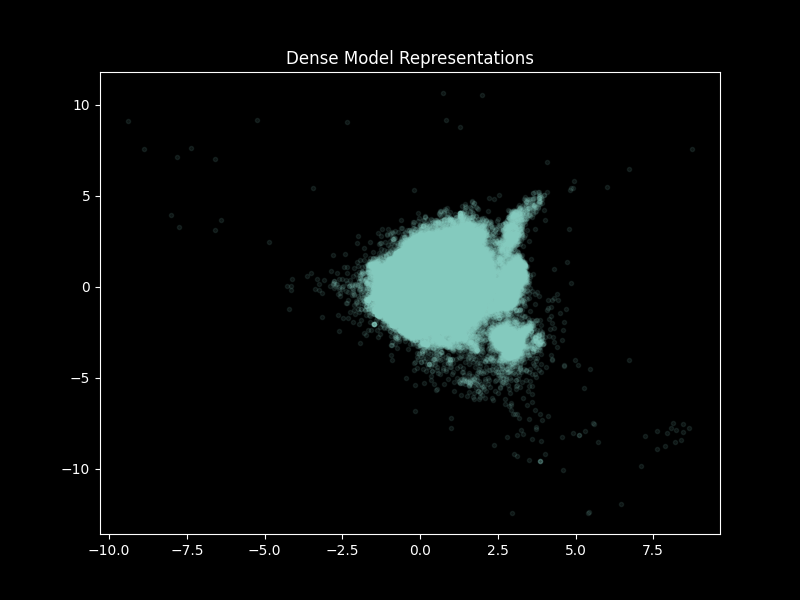

In [8]:
from SeReGen.visualize import repr_scatterplot
import importlib, SeReGen.visualize
repr_scatterplot = importlib.reload(SeReGen.visualize).repr_scatterplot
repr_scatterplot(dense_reprs, "Dense Model Representations", savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

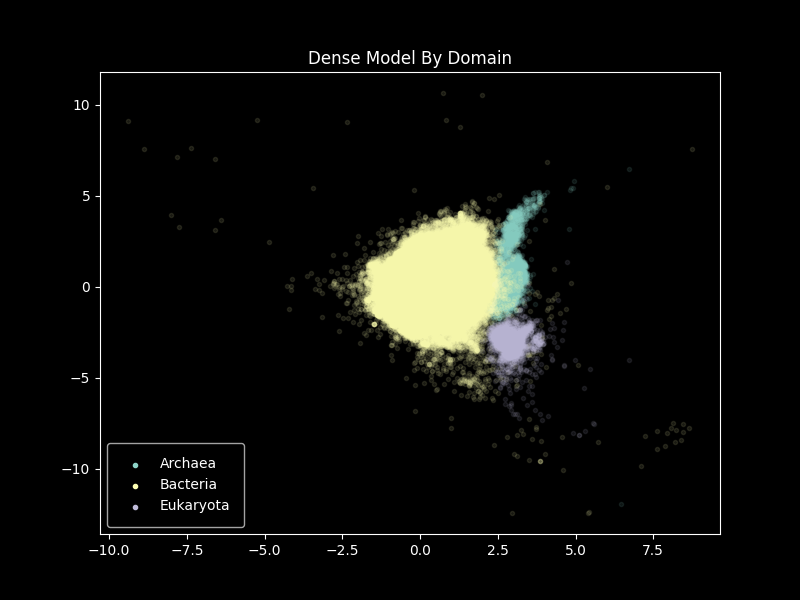

In [9]:
from SeReGen.visualize import reprs_by_ds_label
import importlib, SeReGen.visualize
reprs_by_ds_label = importlib.reload(SeReGen.visualize).reprs_by_ds_label
reprs_by_ds_label(dense_reprs, dataset, 'Domain', title='Dense Model By Domain', marker='.', alpha=.1, savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

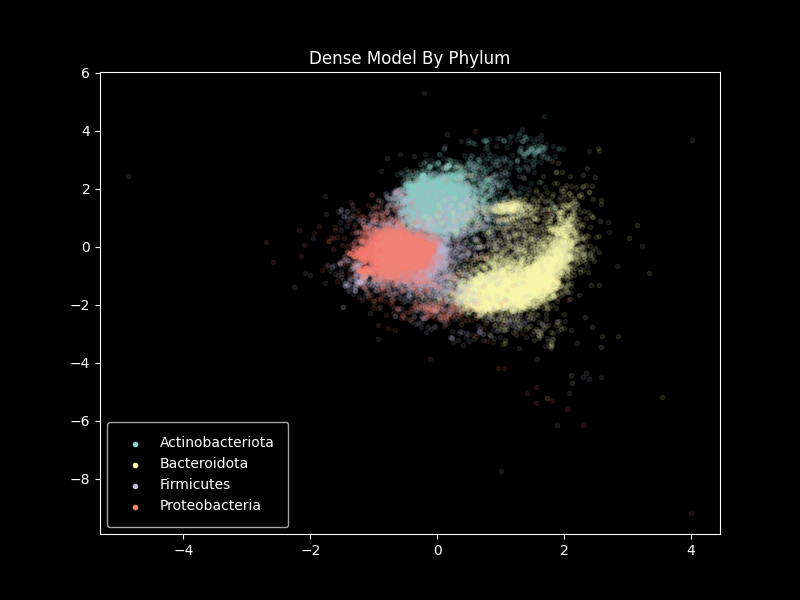

In [16]:
from SeReGen.visualize import reprs_by_ds_label
mask = dataset['labels'].label_mask('Domain', 'Bacteria')
reprs_by_ds_label(dense_reprs, dataset, 'Phylum', 'Dense Model By Phylum', filter=10000, mask=mask, marker='.',
              savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

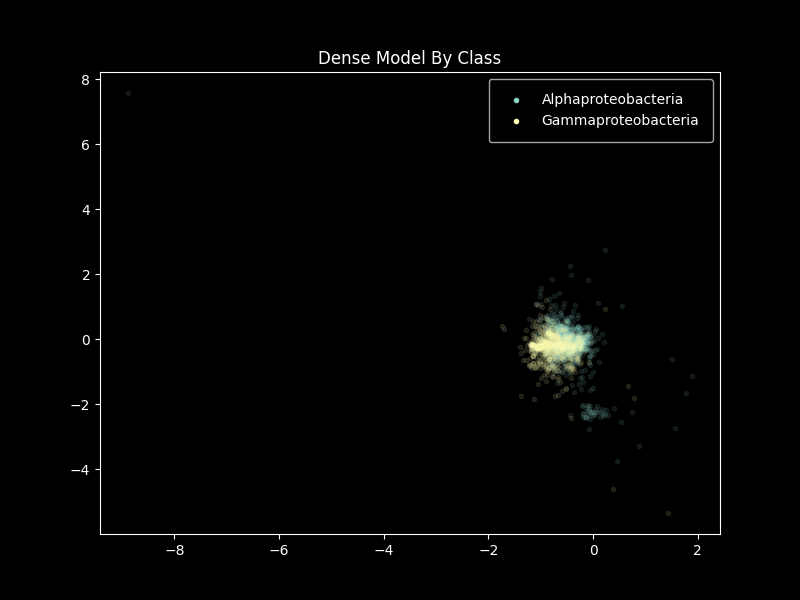

In [17]:
from SeReGen.visualize import reprs_by_ds_label
mask = dataset['labels'].label_mask('Phylum', 'Proteobacteria')
reprs_by_ds_label(dense_reprs, dataset, 'Class', 'Dense Model By Class', filter=1000, mask=mask, savepath='out.png',
              alpha=.1, marker='.')
from IPython.display import Image
Image(filename='out.png')

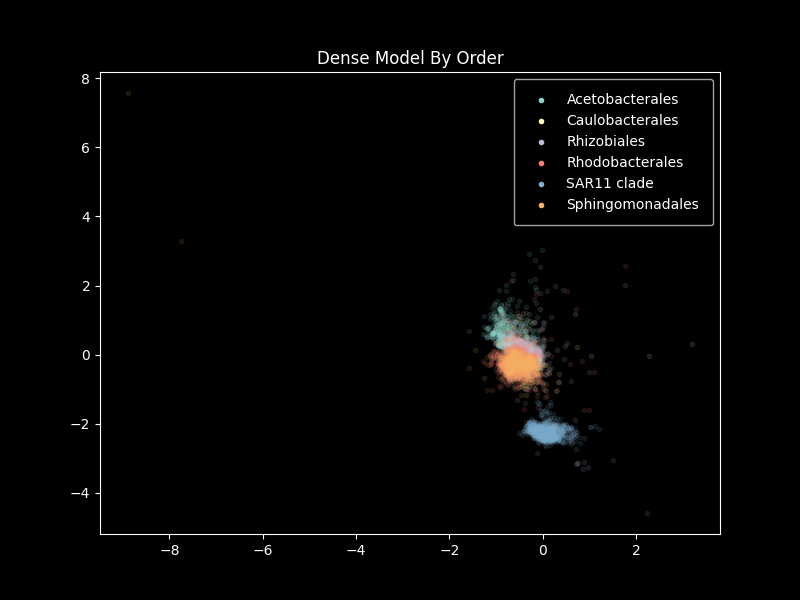

In [18]:
from SeReGen.visualize import reprs_by_ds_label
mask = dataset['labels'].label_mask('Class', 'Alphaproteobacteria')
reprs_by_ds_label(dense_reprs, dataset, 'Order', 'Dense Model By Order', filter=1000, mask=mask, savepath='out.png',
              alpha=.1, marker='.')
from IPython.display import Image
Image(filename='out.png')

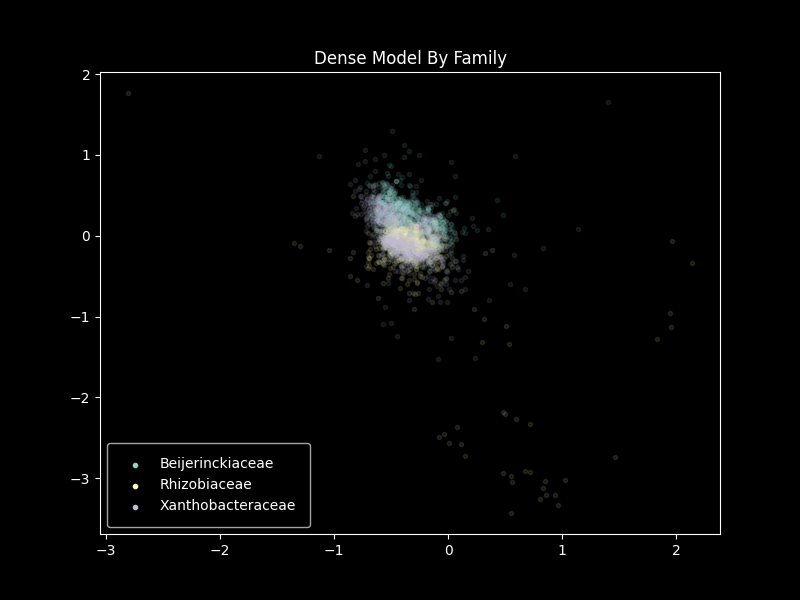

In [19]:
from SeReGen.visualize import reprs_by_ds_label
mask = dataset['labels'].label_mask('Order', 'Rhizobiales')
reprs_by_ds_label(dense_reprs, dataset, 'Family', 'Dense Model By Family', filter=1000, mask=mask, savepath='out.png',
              alpha=.1, marker='.')
from IPython.display import Image
Image(filename='out.png')

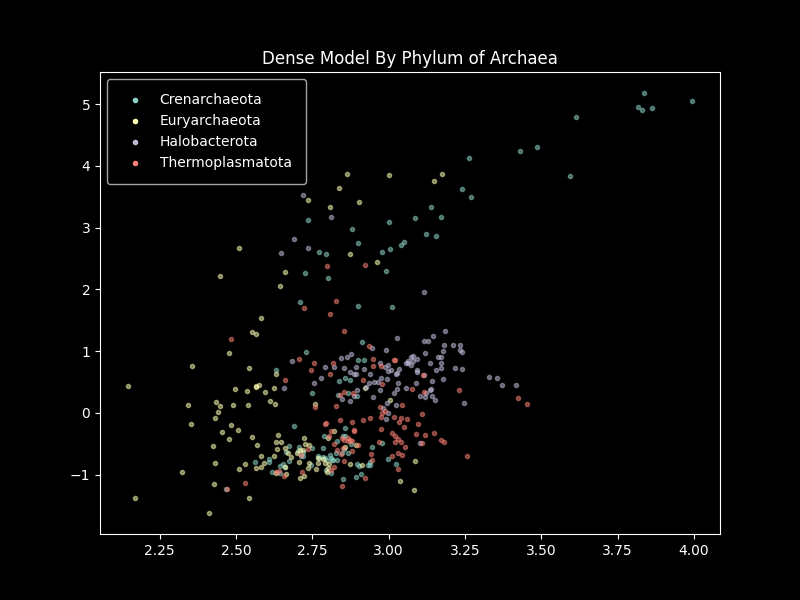

In [20]:
from SeReGen.visualize import reprs_by_ds_label
mask = dataset['labels'].label_mask('Domain', 'Archaea')
reprs_by_ds_label(dense_reprs, dataset, 'Phylum', 'Dense Model By Phylum of Archaea', filter=100, mask=mask, marker='.',
              savepath='out.png', alpha=.5)
from IPython.display import Image
Image(filename='out.png')

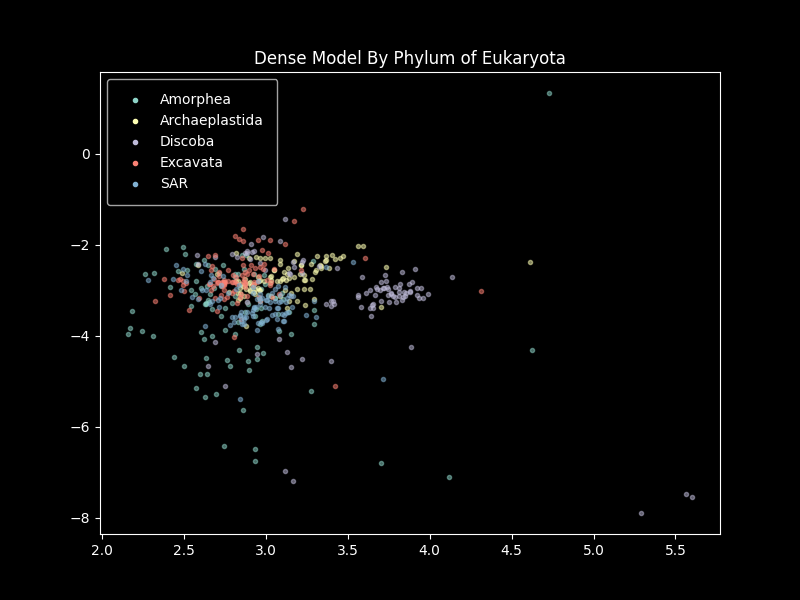

In [21]:
from SeReGen.visualize import reprs_by_ds_label
mask = dataset['labels'].label_mask('Domain', 'Eukaryota')
reprs_by_ds_label(dense_reprs, dataset, 'Phylum', 'Dense Model By Phylum of Eukaryota', filter=100, mask=mask, marker='.',
              savepath='out.png', alpha=.5)
from IPython.display import Image
Image(filename='out.png')

## ConvNet

In [18]:
from SeqRep.encoders import ModelBuilder
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()
builder = ModelBuilder(1024, distribute_strategy=strategy)
builder.dense(256)
builder.embeddings(1)
builder.conv1D(64, 4, 64)
builder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_16 (Dense)            (None, 256)               262400    
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 reshape_5 (Reshape)         (None, 256, 1)            0         
                                                                 
 conv1d (Conv1D)             (None, 253, 64)           320       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 126, 64)          0         
 )                                                               
                                                           

In [33]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import Euclidean
conv_comp = ComparativeEncoder.from_model_builder(builder, dist=Euclidean())

In [34]:
conv_comp.fit(kmer_counts, batch_size=1000, epochs=6, jobs=16, chunksize=500)

Epoch 1:


100%|██████████| 377304/377304 [00:06<00:00, 53985.96it/s]
2023-05-19 10:43:42.134305: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2023-05-19 10:43:42.922886: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


378/378 [==============================] - 12s 9ms/step - loss: 0.2254
Epoch time: 26.77493977546692
Epoch 2:


100%|██████████| 377304/377304 [00:06<00:00, 54990.67it/s]


378/378 [==============================] - 3s 8ms/step - loss: 0.2155
Epoch time: 18.58944082260132
Epoch 3:


100%|██████████| 377304/377304 [00:07<00:00, 51714.18it/s]


378/378 [==============================] - 3s 8ms/step - loss: 0.2113
Epoch time: 18.212770462036133
Epoch 4:


100%|██████████| 377304/377304 [00:06<00:00, 54256.16it/s]


378/378 [==============================] - 3s 8ms/step - loss: 0.2098
Epoch time: 17.857067108154297
Epoch 5:


100%|██████████| 377304/377304 [00:07<00:00, 53642.99it/s]


378/378 [==============================] - 3s 9ms/step - loss: 0.2075
Epoch time: 18.16434931755066
Epoch 6:


100%|██████████| 377304/377304 [00:07<00:00, 53712.45it/s]


378/378 [==============================] - 3s 9ms/step - loss: 0.2084
Epoch time: 18.049562692642212


In [35]:
conv_comp.save('Models/convnet')

In [5]:
from SeqRep.comparative_encoder import ComparativeEncoder
conv_comp = ComparativeEncoder.load('Models/convnet')

2023-05-19 10:47:44.513153: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 10:47:45.884383: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38251 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0
2023-05-19 10:47:45.886552: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38251 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
2023-05-19 10:47:45.888333: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

In [6]:
conv_reprs = conv_comp.transform(kmer_counts, batch_size=1000)

2023-05-19 10:47:48.064207: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-19 10:47:48.555950: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


11791/11791 [==============================] - 13s 989us/step


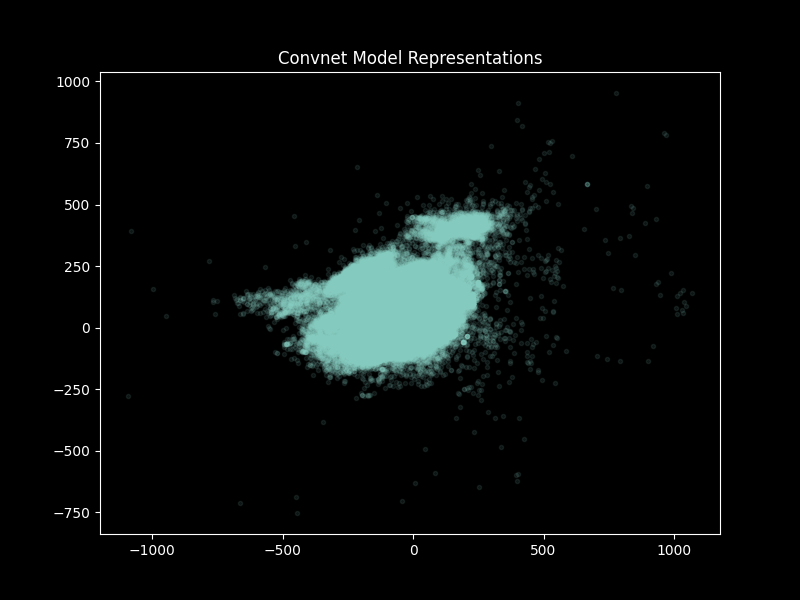

In [7]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(conv_reprs, "Convnet Model Representations", savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

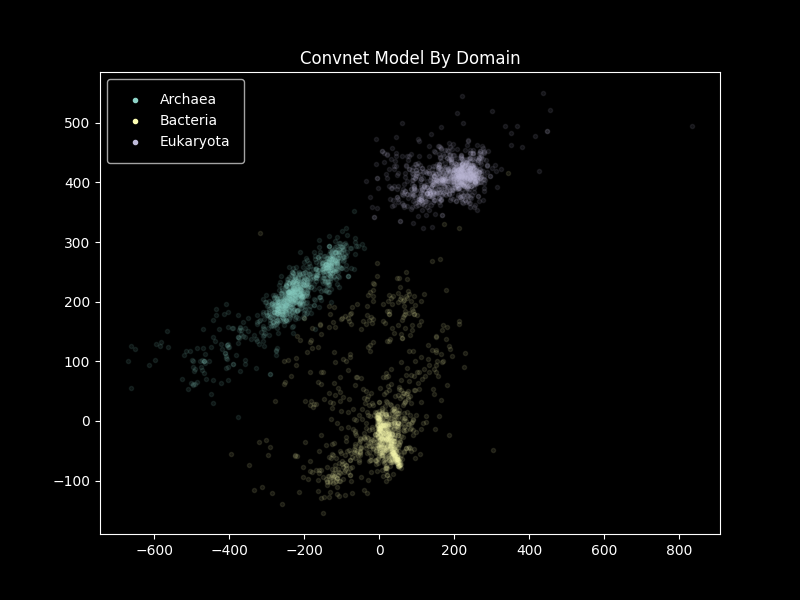

In [8]:
from SeqRep.visualize import reprs_by_label
reprs_by_label(conv_reprs, dataset, 'Domain', 'Convnet Model By Domain', savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

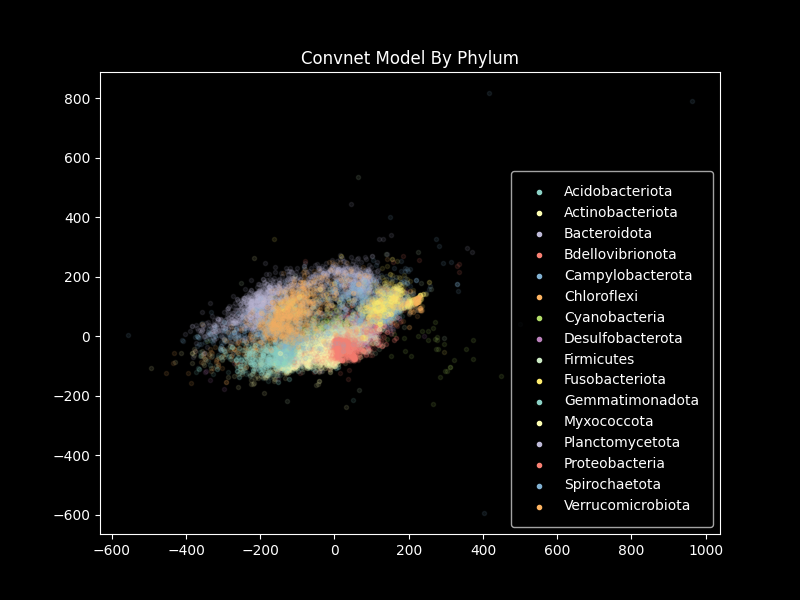

In [9]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Domain', 'Bacteria')
reprs_by_label(conv_reprs, dataset, 'Phylum', 'Convnet Model By Phylum', filter=1000, mask=mask, savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

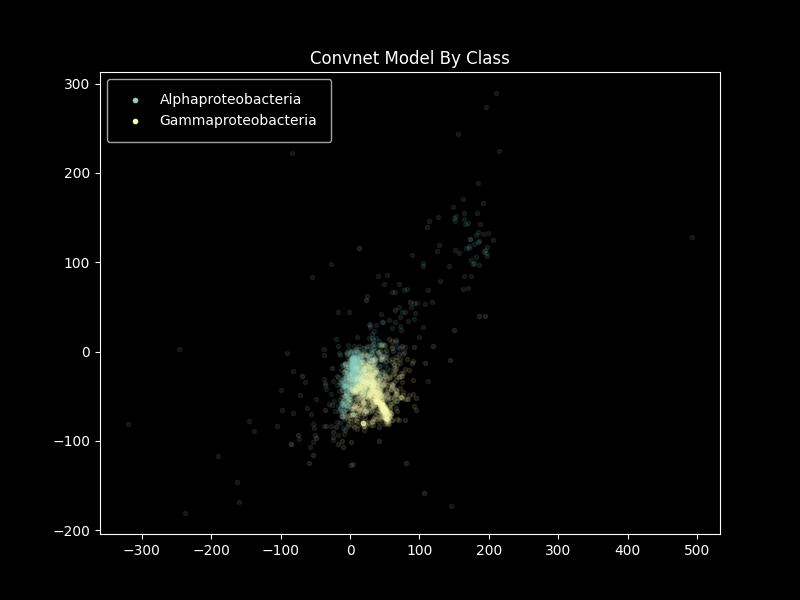

In [10]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Phylum', 'Proteobacteria')
reprs_by_label(conv_reprs, dataset, 'Class', 'Convnet Model By Class', filter=1000, mask=mask, savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

## Attention Network

In [20]:
from SeqRep.encoders import ModelBuilder
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()
builder = ModelBuilder(1024, distribute_strategy=strategy)
builder.dense(1024)
builder.reshape((256, 4))
builder.attention(2, 256)
builder.dense(256)
builder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_22 (Dense)            (None, 1024)              1049600   
                                                                 
 reshape_7 (Reshape)         (None, 256, 4)            0         
                                                                 
 attention_block_6 (Attentio  (None, 256, 4)           2480      
 nBlock)                                                         
                                                                 
 batch_normalization_7 (Batc  (None, 256, 4)           16        
 hNormalization)                                                 
                                                                 
 dense_25 (Dense)            (None, 256, 256)          1280

In [21]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import Euclidean
attn_comp = ComparativeEncoder.from_model_builder(builder, dist=Euclidean())

In [22]:
attn_comp.fit(kmer_counts, batch_size=1000, epochs=10, jobs=16, chunksize=1000)

Epoch 1:


100%|██████████| 377304/377304 [00:09<00:00, 41831.38it/s]


378/378 [==============================] - 16s 22ms/step - loss: 0.2346
Epoch time: 32.093934059143066
Epoch 2:


100%|██████████| 377304/377304 [00:07<00:00, 53708.29it/s]


378/378 [==============================] - 8s 21ms/step - loss: 0.2192
Epoch time: 21.872977256774902
Epoch 3:


100%|██████████| 377304/377304 [00:08<00:00, 46871.24it/s]


378/378 [==============================] - 8s 22ms/step - loss: 0.2154
Epoch time: 23.56111717224121
Epoch 4:


100%|██████████| 377304/377304 [00:07<00:00, 52384.53it/s]


378/378 [==============================] - 8s 21ms/step - loss: 0.2128
Epoch time: 23.901883840560913
Epoch 5:


100%|██████████| 377304/377304 [00:08<00:00, 46033.06it/s]


378/378 [==============================] - 8s 22ms/step - loss: 0.2118
Epoch time: 24.328302145004272
Epoch 6:


100%|██████████| 377304/377304 [00:09<00:00, 41414.59it/s]


378/378 [==============================] - 8s 21ms/step - loss: 0.2130
Epoch time: 24.81874656677246
Epoch 7:


100%|██████████| 377304/377304 [00:08<00:00, 45359.80it/s]


378/378 [==============================] - 8s 21ms/step - loss: 0.2117
Epoch time: 23.978023290634155
Epoch 8:


100%|██████████| 377304/377304 [00:06<00:00, 54662.25it/s]


378/378 [==============================] - 8s 21ms/step - loss: 0.2114
Epoch time: 22.450661420822144
Epoch 9:


100%|██████████| 377304/377304 [00:08<00:00, 45799.51it/s]


378/378 [==============================] - 8s 22ms/step - loss: 0.2101
Epoch time: 24.191484451293945
Epoch 10:


100%|██████████| 377304/377304 [00:09<00:00, 41362.85it/s]


378/378 [==============================] - 8s 22ms/step - loss: 0.2108
Epoch time: 24.98439335823059


In [23]:
attn_comp.save('Models/attn')

In [11]:
from SeqRep.comparative_encoder import ComparativeEncoder
attn_comp = ComparativeEncoder.load('Models/attn')

In [24]:
attn_reprs = attn_comp.transform(kmer_counts, batch_size=100)

2023-05-19 10:57:04.937908: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_149482"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\022FlatMapDataset:381"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRO

11791/11791 [==============================] - 45s 4ms/step


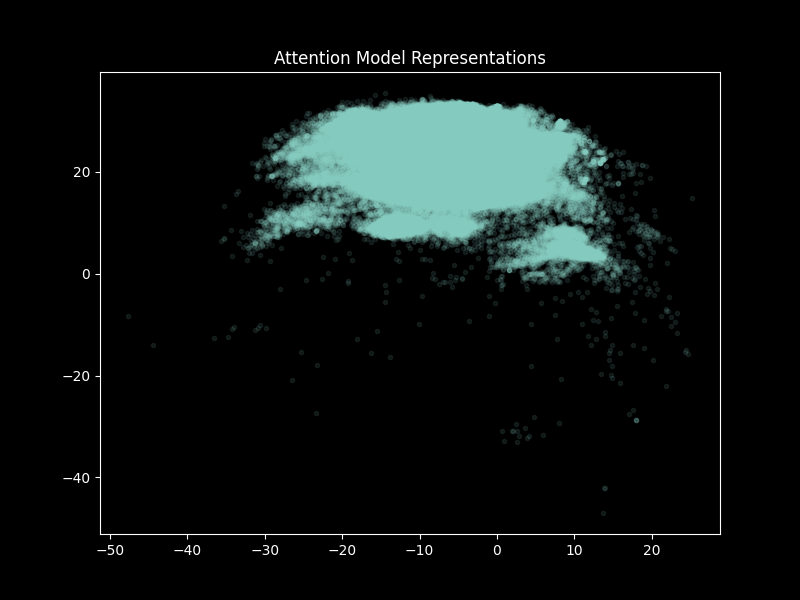

In [30]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(attn_reprs, "Attention Model Representations", savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

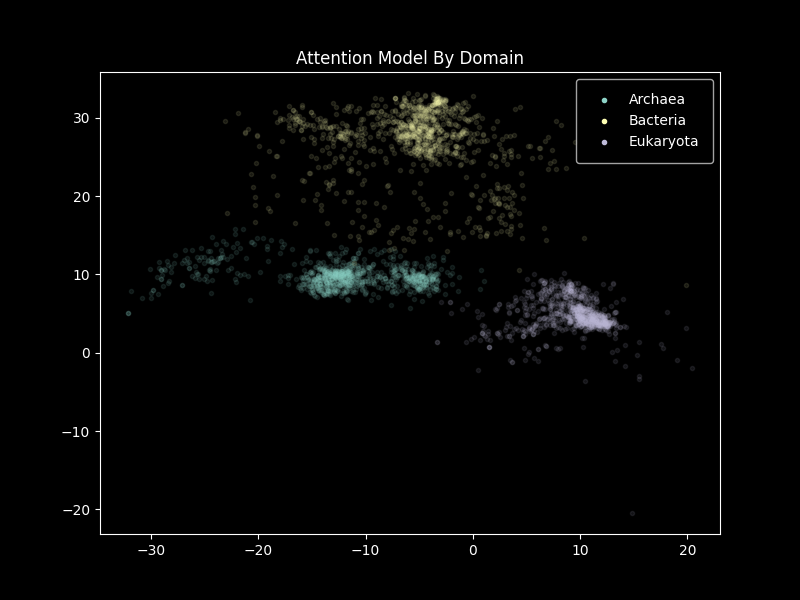

In [29]:
from SeqRep.visualize import reprs_by_label
reprs_by_label(attn_reprs, dataset, 'Domain', 'Attention Model By Domain', savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

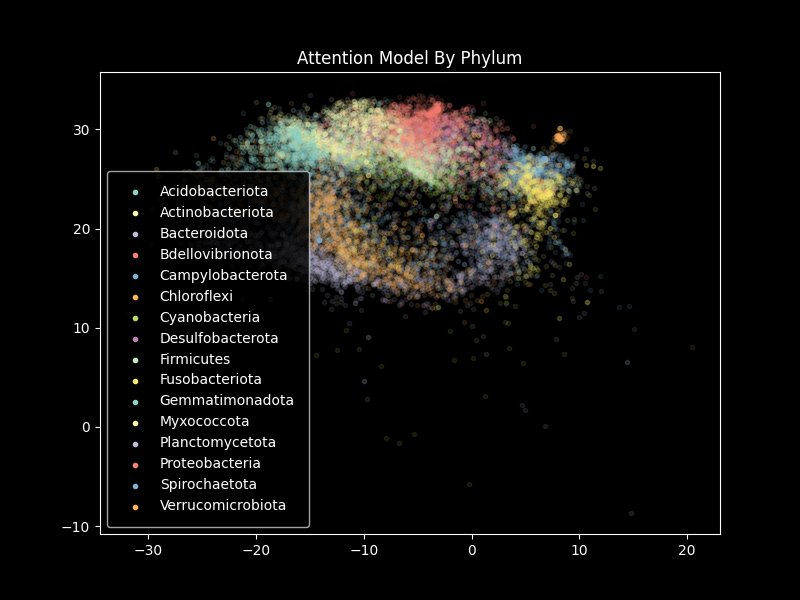

In [31]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Domain', 'Bacteria')
reprs_by_label(attn_reprs, dataset, 'Phylum', 'Attention Model By Phylum', filter=1000, mask=mask,
               savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

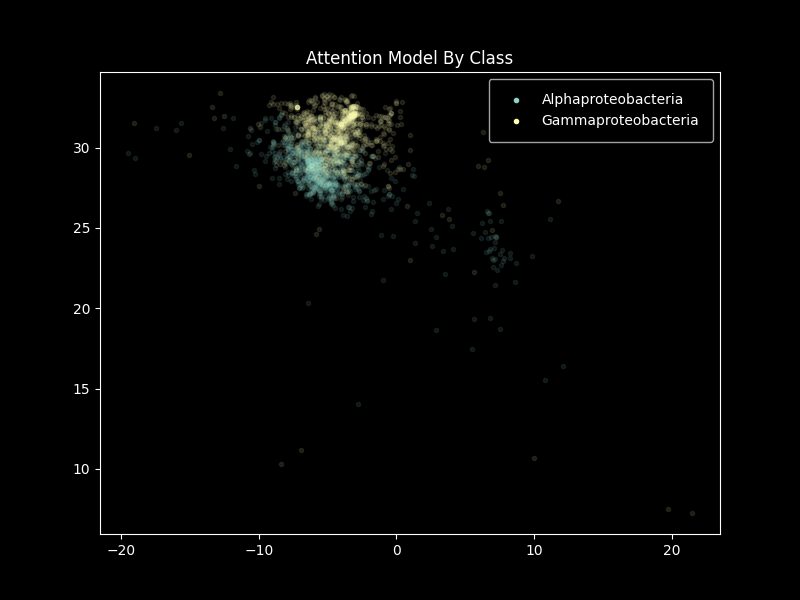

In [32]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Phylum', 'Proteobacteria')
reprs_by_label(attn_reprs, dataset, 'Class', 'Attention Model By Class', filter=1000, mask=mask, savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

## Attention-Conv Network

In [35]:
from SeqRep.encoders import ModelBuilder
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()
builder = ModelBuilder(1024, distribute_strategy=strategy)
builder.dense(1024)
builder.embeddings(1)
builder.conv1D(64, 4, 256)
builder.embeddings(4)
builder.attention(2, 256)
builder.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 1024)]            0         
                                                                 
 dense_40 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_41 (Dense)            (None, 1024)              1049600   
                                                                 
 reshape_12 (Reshape)        (None, 1024, 1)           0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1021, 64)          320       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 510, 64)          0         
 1D)                                                             
                                                          

In [36]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import Euclidean
attn_comp = ComparativeEncoder.from_model_builder(builder, dist=Euclidean())

In [37]:
attn_comp.fit(kmer_counts, batch_size=1000, epochs=12, jobs=16, chunksize=1000)

Epoch 1:
ERROR! Session/line number was not unique in database. History logging moved to new session 253


100%|██████████| 377304/377304 [00:07<00:00, 53121.10it/s]
2023-05-19 11:02:49.706728: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2023-05-19 11:02:50.963045: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


378/378 [==============================] - 25s 30ms/step - loss: 0.2579
Epoch time: 44.22612452507019
Epoch 2:


100%|██████████| 377304/377304 [00:08<00:00, 44356.72it/s]


378/378 [==============================] - 11s 30ms/step - loss: 0.2538
Epoch time: 27.952216863632202
Epoch 3:


100%|██████████| 377304/377304 [00:07<00:00, 49703.52it/s]


378/378 [==============================] - 11s 30ms/step - loss: 0.2375
Epoch time: 27.134868144989014
Epoch 4:


100%|██████████| 377304/377304 [00:08<00:00, 43777.43it/s]


378/378 [==============================] - 11s 30ms/step - loss: 0.2429
Epoch time: 28.20005178451538
Epoch 5:


100%|██████████| 377304/377304 [00:07<00:00, 47749.70it/s]


378/378 [==============================] - 11s 30ms/step - loss: 0.2366
Epoch time: 27.64865517616272
Epoch 6:


100%|██████████| 377304/377304 [00:08<00:00, 45997.95it/s]


378/378 [==============================] - 11s 30ms/step - loss: 0.2358
Epoch time: 27.709978342056274
Epoch 7:


100%|██████████| 377304/377304 [00:08<00:00, 45810.41it/s]


378/378 [==============================] - 11s 30ms/step - loss: 0.2728
Epoch time: 27.615022659301758
Epoch 8:


100%|██████████| 377304/377304 [00:08<00:00, 46339.02it/s]


378/378 [==============================] - 11s 30ms/step - loss: 0.2434
Epoch time: 27.71467924118042
Epoch 9:


100%|██████████| 377304/377304 [00:07<00:00, 53152.95it/s]


378/378 [==============================] - 11s 30ms/step - loss: 0.2356
Epoch time: 26.84553861618042
Epoch 10:


100%|██████████| 377304/377304 [00:08<00:00, 43502.05it/s]


378/378 [==============================] - 12s 30ms/step - loss: 0.2275
Epoch time: 28.593915462493896
Epoch 11:


100%|██████████| 377304/377304 [00:08<00:00, 46137.95it/s]


378/378 [==============================] - 11s 30ms/step - loss: 0.2251
Epoch time: 27.974863052368164
Epoch 12:


100%|██████████| 377304/377304 [00:07<00:00, 53654.77it/s]


378/378 [==============================] - 11s 30ms/step - loss: 0.2257
Epoch time: 26.580585479736328


In [38]:
attn_comp.save('Models/attn-conv')

In [11]:
from SeqRep.comparative_encoder import ComparativeEncoder
attn_comp = ComparativeEncoder.load('Models/attn')

In [39]:
attn_reprs = attn_comp.transform(kmer_counts, batch_size=1000)

2023-05-19 11:08:14.869673: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:776] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Did not find a shardable source, walked to a node which is not a dataset: name: "FlatMapDataset/_9"
op: "FlatMapDataset"
input: "PrefetchDataset/_8"
attr {
  key: "Targuments"
  value {
    list {
    }
  }
}
attr {
  key: "_cardinality"
  value {
    i: -2
  }
}
attr {
  key: "f"
  value {
    func {
      name: "__inference_Dataset_flat_map_slice_batch_indices_300795"
    }
  }
}
attr {
  key: "metadata"
  value {
    s: "\n\022FlatMapDataset:807"
  }
}
attr {
  key: "output_shapes"
  value {
    list {
      shape {
        dim {
          size: -1
        }
      }
    }
  }
}
attr {
  key: "output_types"
  value {
    list {
      type: DT_INT64
    }
  }
}
experimental_type {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_DATASET
    args {
      type_id: TFT_PRO

11791/11791 [==============================] - 48s 4ms/step


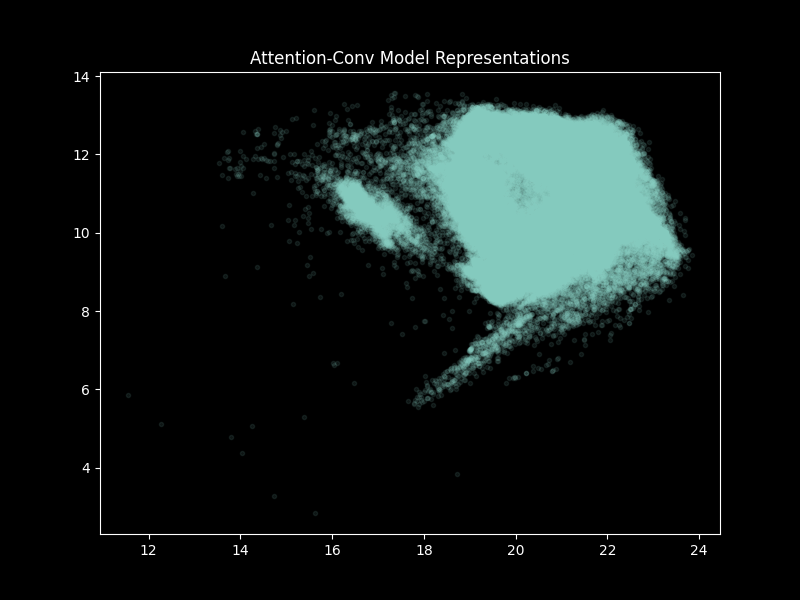

In [40]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(attn_reprs, "Attention-Conv Model Representations", savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

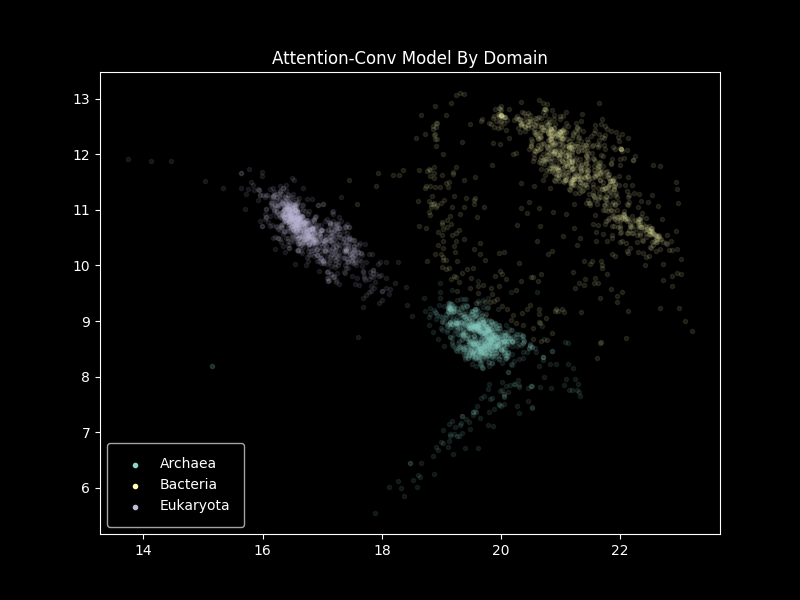

In [41]:
from SeqRep.visualize import reprs_by_label
reprs_by_label(attn_reprs, dataset, 'Domain', 'Attention-Conv Model By Domain', savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

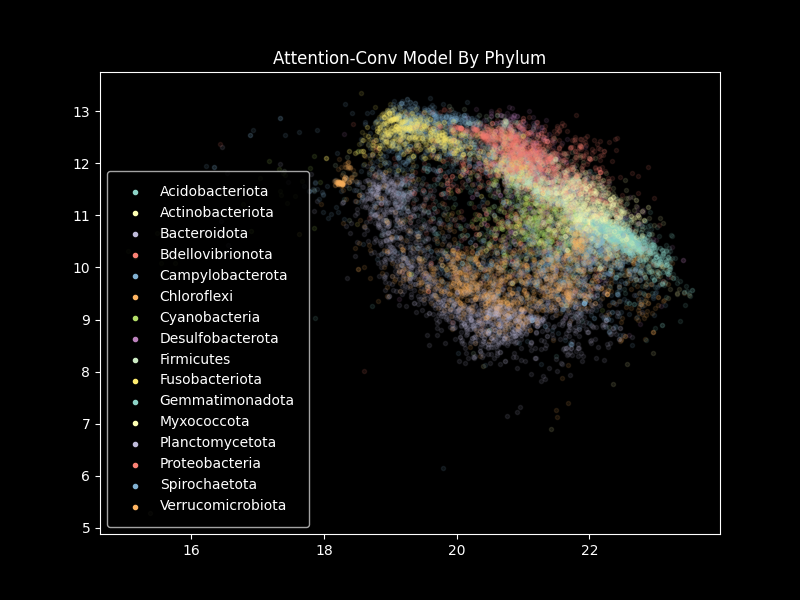

In [42]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Domain', 'Bacteria')
reprs_by_label(attn_reprs, dataset, 'Phylum', 'Attention-Conv Model By Phylum', filter=1000, mask=mask,
              savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

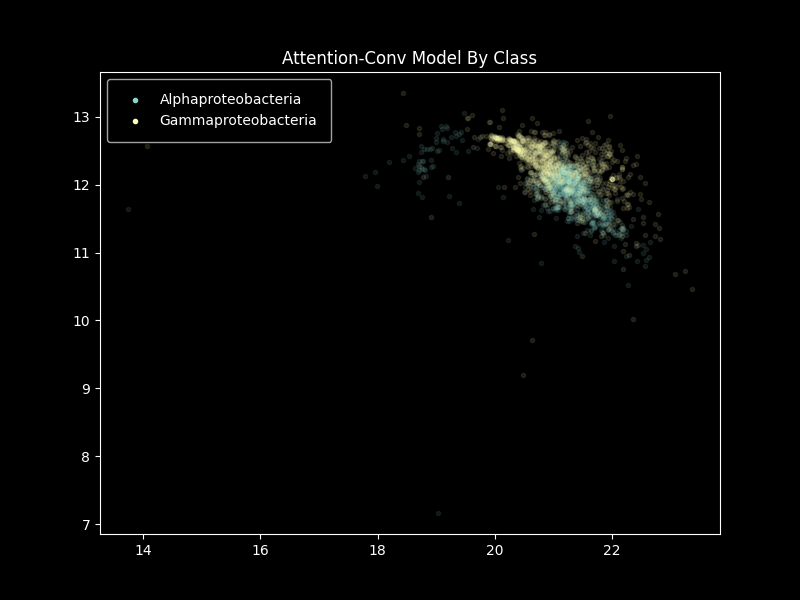

In [44]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Phylum', 'Proteobacteria')
reprs_by_label(attn_reprs, dataset, 'Class', 'Attention-Conv Model By Class', filter=1000, mask=mask,
              savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

## Sequential Model

In [4]:
dataset.trim_seqs(750)

In [5]:
encoded = dataset.one_hot_encode(jobs=7, chunksize=50)

In [6]:
from SeqRep.encoders import ModelBuilder
import tensorflow as tf
strategy = tf.distribute.MirroredStrategy()
builder = ModelBuilder(encoded.shape[1:], distribute_strategy=strategy)
builder.flatten()
builder.dense(256)
builder.embeddings(4)
builder.conv1D(256, 16, 256)
builder.embeddings(4)
builder.attention(4, 256)
builder.summary()

2023-05-19 11:19:13.567593: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-19 11:19:15.068176: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38251 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0
2023-05-19 11:19:15.070416: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38251 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
2023-05-19 11:19:15.072156: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 750, 5)]          0         
                                                                 
 flatten (Flatten)           (None, 3750)              0         
                                                                 
 dense (Dense)               (None, 256)               960256    
                                                                 
 dense_1 (Dense)             (None, 1024)              263168    
                                                                 
 reshape (Reshape)           (None, 256, 4)            0         
                                                                 
 conv1d (Conv1D)             (None, 241, 256)          16640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 120, 256)         0     

In [7]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import Euclidean
seq_comp = ComparativeEncoder.from_model_builder(builder, dist=Euclidean())

In [9]:
seq_comp.fit(encoded, batch_size=100, epochs=16, jobs=16, chunksize=1000, distance_on=kmer_counts)

Epoch 1:


100%|██████████| 377304/377304 [00:10<00:00, 34715.98it/s]
2023-05-19 11:20:06.940213: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-19 11:20:07.731392: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2023-05-19 11:20:08.675543: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204
2023-05-19 11:20:09.521426: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


3774/3774 [==============================] - 72s 15ms/step - loss: nan
Epoch time: 102.89854764938354
Epoch 2:


100%|██████████| 377304/377304 [00:10<00:00, 37342.98it/s]


3774/3774 [==============================] - 61s 16ms/step - loss: nan
Epoch time: 97.5804717540741
Epoch 3:


100%|██████████| 377304/377304 [00:09<00:00, 39645.53it/s]


3774/3774 [==============================] - 60s 16ms/step - loss: nan
Epoch time: 96.35121154785156
Epoch 4:


100%|██████████| 377304/377304 [00:08<00:00, 43472.86it/s]


3774/3774 [==============================] - 60s 16ms/step - loss: nan
Epoch time: 95.57761549949646
Epoch 5:


100%|██████████| 377304/377304 [00:07<00:00, 48417.77it/s]


3774/3774 [==============================] - 60s 16ms/step - loss: nan
Epoch time: 95.43125939369202
Epoch 7:


100%|██████████| 377304/377304 [00:09<00:00, 41306.76it/s]


3774/3774 [==============================] - 59s 16ms/step - loss: nan
Epoch time: 96.07732129096985
Epoch 8:


100%|██████████| 377304/377304 [00:09<00:00, 41276.48it/s]


3196/3774 [========================>.....] - ETA: 9s - loss: 0.4247

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
seq_comp.save('Models/seq_attn')

In [20]:
from SeqRep.comparative_encoder import ComparativeEncoder
seq_comp = ComparativeEncoder.load('Models/seq_attn')

In [21]:
seq_reprs = seq_comp.transform(encoded, batch_size=100)

 6616/11791 [===============>..............] - ETA: 14s

KeyboardInterrupt: 

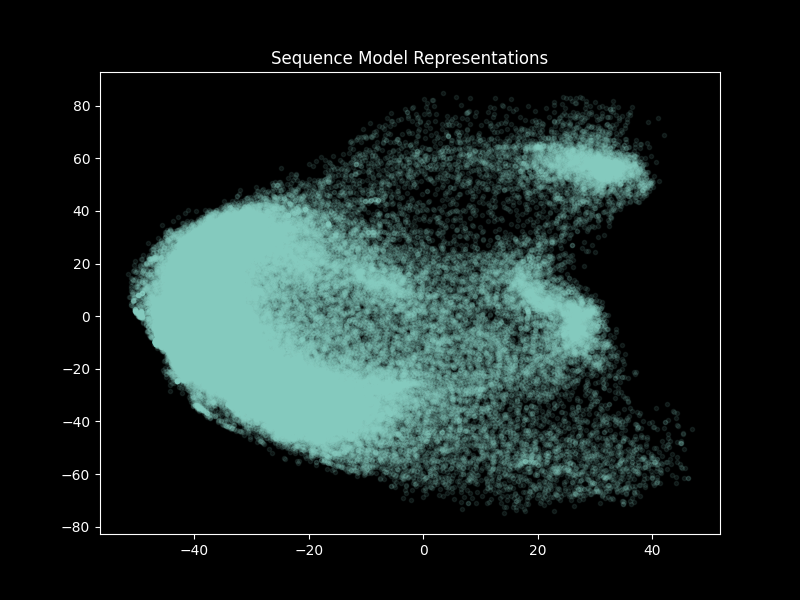

In [16]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(seq_reprs, "Sequence Model Representations", savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

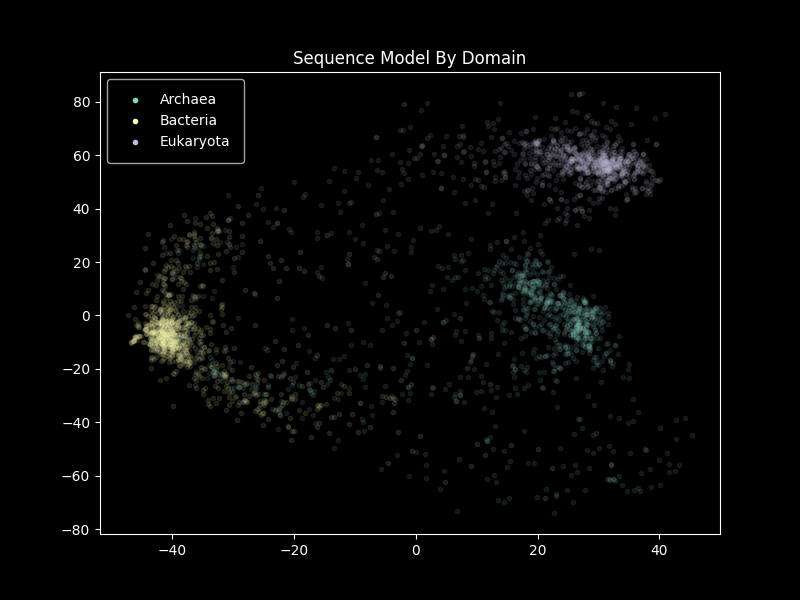

In [17]:
from SeqRep.visualize import reprs_by_label
reprs_by_label(seq_reprs, dataset, 'Domain', 'Sequence Model By Domain', savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

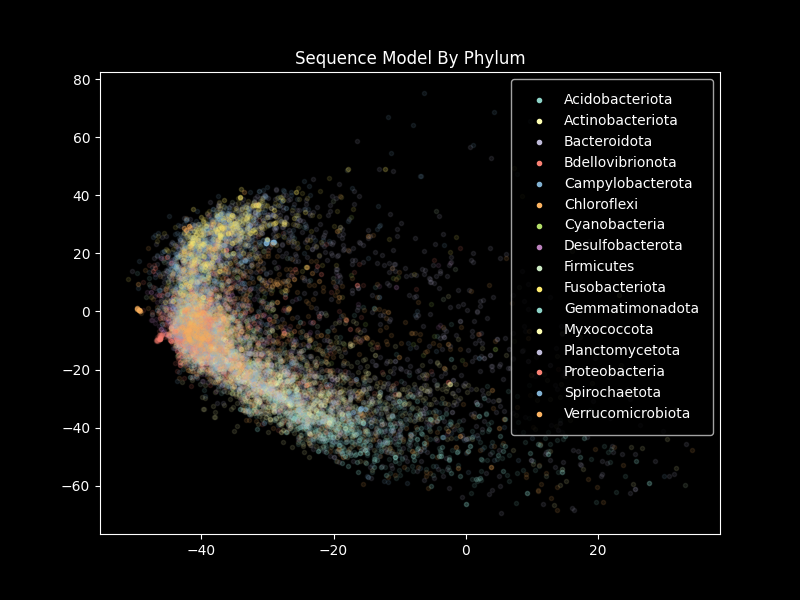

In [18]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Domain', 'Bacteria')
reprs_by_label(seq_reprs, dataset, 'Phylum', 'Sequence Model By Phylum', filter=1000, mask=mask,
              savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

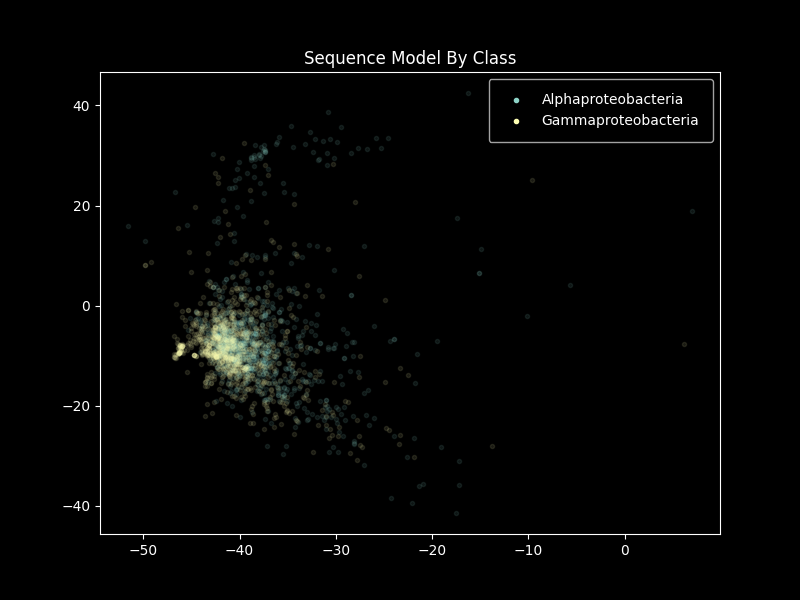

In [19]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Phylum', 'Proteobacteria')
reprs_by_label(seq_reprs, dataset, 'Class', 'Sequence Model By Class', filter=1000, mask=mask,
              savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

## Alignment Distance

In [3]:
dataset.trim_seqs(300)
encoded = dataset.one_hot_encode(jobs=127, chunksize=100)

In [4]:
from SeqRep.encoders import ModelBuilder
builder = ModelBuilder(encoded.shape[1:])
builder.dense(50)
builder.reshape((100, 50 * 3))
builder.conv1D(20, 3, 100 * 50 * 3)
builder.reshape((100, 50 * 3))
builder.attention(4, 100)
builder.attention(4, 100)
builder.conv1D(20, 3, 980)
aln_model = builder.compile(output_dim=2)
aln_model.summary()

2023-05-09 12:55:09.469630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 12:55:10.780735: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38251 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0
2023-05-09 12:55:10.782979: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38251 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
2023-05-09 12:55:10.784687: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 5)]          0         
                                                                 
 dense (Dense)               (None, 300, 50)           300       
                                                                 
 reshape (Reshape)           (None, 100, 150)          0         
                                                                 
 conv1d (Conv1D)             (None, 98, 20)            9020      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 20)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 980)               0         
                                                             

In [5]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import Alignment
aln_comp = ComparativeEncoder(aln_model, dist=Alignment())

In [6]:
aln_comp.fit(encoded, batch_size=1000, epochs=10, jobs=127, chunksize=200, distance_on=dataset['seqs'].to_numpy())

Epoch 1:


100%|██████████| 334360/334360 [00:02<00:00, 143874.12it/s]
2023-05-09 12:55:30.121035: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-09 12:55:30.584230: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


335/335 [==============================] - 71s 194ms/step - loss: 0.2713
Epoch time: 84.17951536178589
Epoch 2:


100%|██████████| 334360/334360 [00:02<00:00, 137576.67it/s]


335/335 [==============================] - 66s 196ms/step - loss: 0.2270
Epoch time: 83.55802774429321
Epoch 3:


100%|██████████| 334360/334360 [00:02<00:00, 147076.97it/s]


335/335 [==============================] - 65s 195ms/step - loss: 0.2241
Epoch time: 82.45276713371277
Epoch 4:


100%|██████████| 334360/334360 [00:02<00:00, 139825.66it/s]


335/335 [==============================] - 67s 201ms/step - loss: 0.2224
Epoch time: 84.90370273590088
Epoch 5:


100%|██████████| 334360/334360 [00:02<00:00, 131921.95it/s]


335/335 [==============================] - 66s 198ms/step - loss: 0.2206
Epoch time: 83.69709515571594
Epoch 6:


100%|██████████| 334360/334360 [00:02<00:00, 134196.55it/s]


335/335 [==============================] - 67s 199ms/step - loss: 0.2209
Epoch time: 83.82523798942566
Epoch 7:


100%|██████████| 334360/334360 [00:02<00:00, 130586.53it/s]


335/335 [==============================] - 66s 196ms/step - loss: 0.2205
Epoch time: 83.2289252281189
Epoch 8:


100%|██████████| 334360/334360 [00:02<00:00, 137883.36it/s]


335/335 [==============================] - 65s 195ms/step - loss: 0.2197
Epoch time: 82.67580676078796
Epoch 10:


100%|██████████| 334360/334360 [00:02<00:00, 135564.53it/s]


335/335 [==============================] - 66s 198ms/step - loss: 0.2199
Epoch time: 83.92034316062927


In [7]:
aln_comp.save('Models/aln_attn')

In [22]:
from SeqRep.comparative_encoder import ComparativeEncoder
aln_comp = ComparativeEncoder.load('Models/aln_attn')

In [24]:
dataset.trim_seqs(300)
encoded = dataset.one_hot_encode()

In [25]:
aln_reprs = aln_comp.transform(encoded, batch_size=1000)

11791/11791 [==============================] - 49s 4ms/step


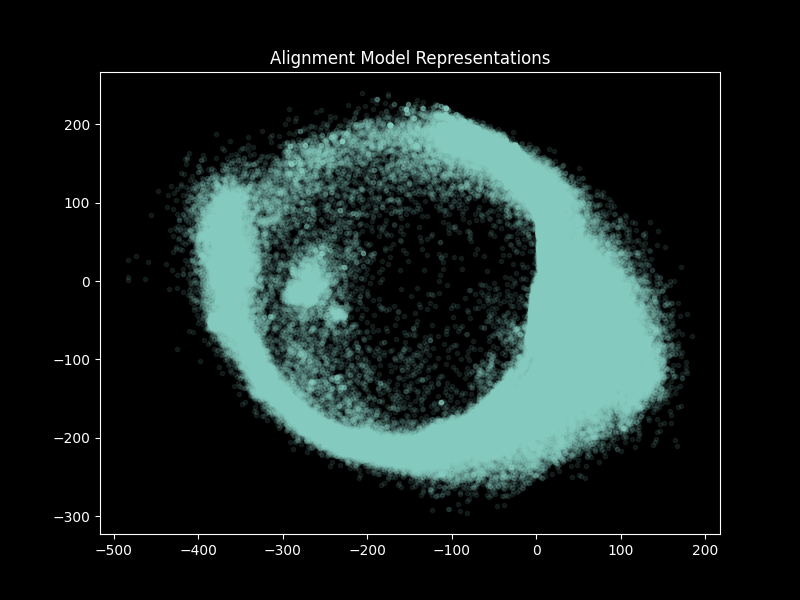

In [26]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(aln_reprs, "Alignment Model Representations", savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

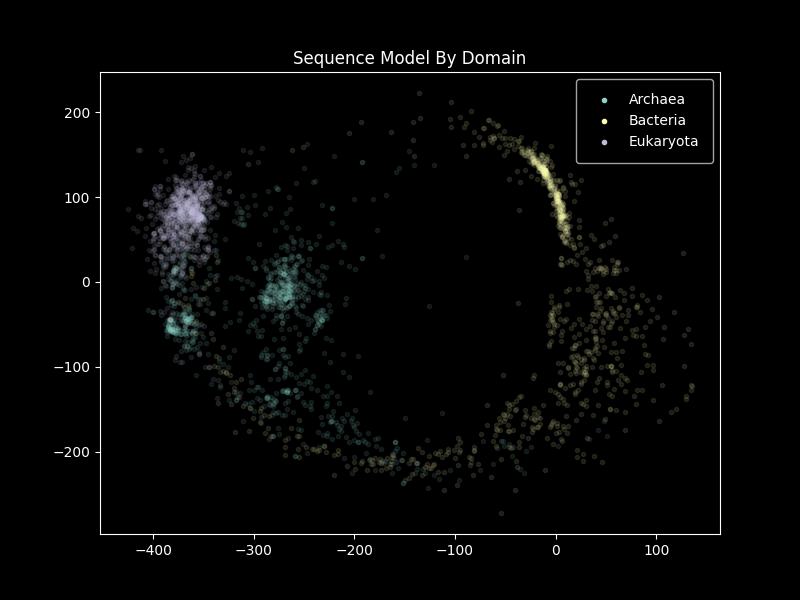

In [28]:
from SeqRep.visualize import reprs_by_label
reprs_by_label(aln_reprs, dataset, 'Domain', 'Sequence Model By Domain', savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

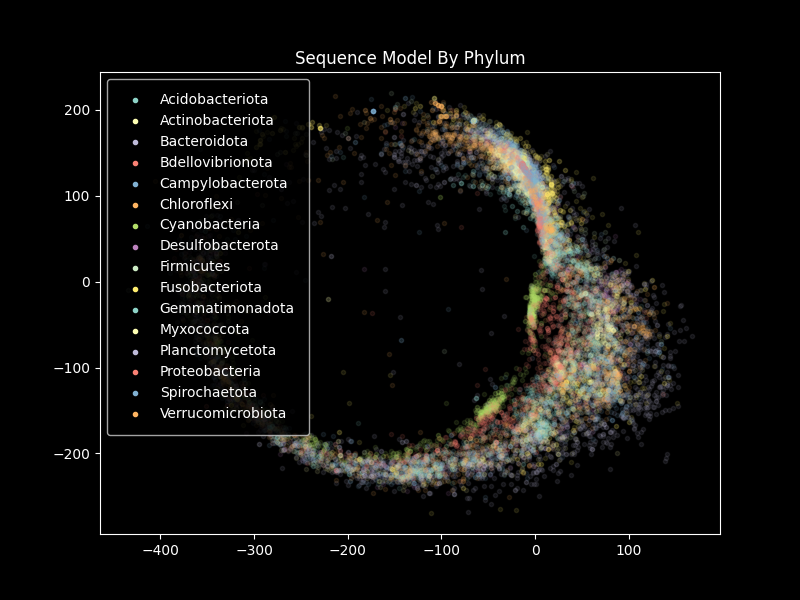

In [29]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Domain', 'Bacteria')
reprs_by_label(aln_reprs, dataset, 'Phylum', 'Sequence Model By Phylum', filter=1000, mask=mask, savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

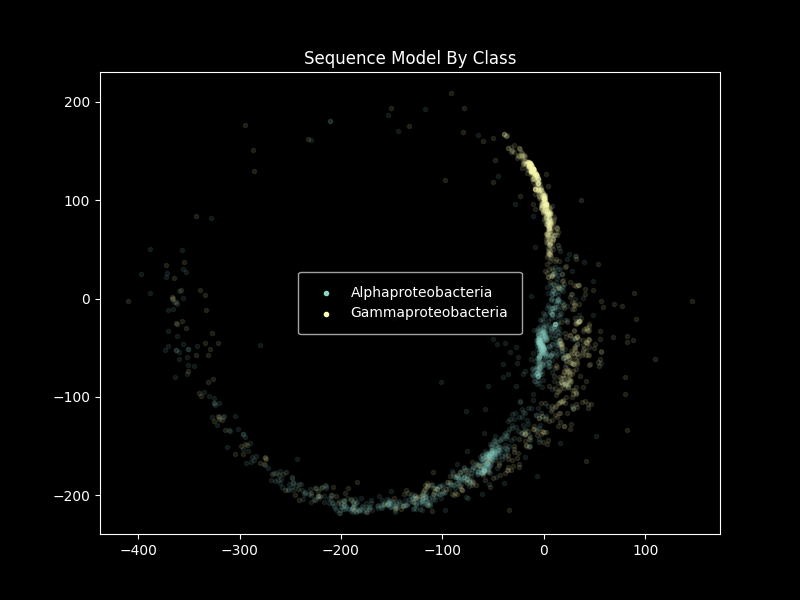

In [30]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Phylum', 'Proteobacteria')
reprs_by_label(aln_reprs, dataset, 'Class', 'Sequence Model By Class', filter=1000, mask=mask, savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

## With KMer Sequences

In [33]:
kmers = dataset.gen_kmer_seqs(2, jobs=64, chunksize=100, trim_to=300)

100%|██████████| 377304/377304 [00:02<00:00, 144065.01it/s]


In [4]:
from SeqRep.encoders import ModelBuilder
builder = ModelBuilder(kmers.shape[1:])
builder.dense(50)
builder.reshape((100, 50 * 3))
builder.conv1D(20, 3, 100 * 50 * 3)
builder.reshape((100, 50 * 3))
builder.attention(4, 100)
builder.attention(4, 100)
builder.conv1D(20, 3, 980)
aln_model = builder.compile(output_dim=2)
aln_model.summary()

2023-05-09 13:20:10.685756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 13:20:12.229270: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38251 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:21:00.0, compute capability: 8.0
2023-05-09 13:20:12.231538: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38251 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
2023-05-09 13:20:12.233467: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/devi

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 16)]         0         
                                                                 
 dense (Dense)               (None, 300, 50)           850       
                                                                 
 reshape (Reshape)           (None, 100, 150)          0         
                                                                 
 conv1d (Conv1D)             (None, 98, 20)            9020      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 20)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 980)               0         
                                                             

In [6]:
from SeqRep.comparative_encoder import ComparativeEncoder
from SeqRep.distance import Alignment
aln_comp = ComparativeEncoder(aln_model, dist=Alignment())

In [7]:
aln_comp.fit(kmers, batch_size=1000, epochs=10, jobs=127, chunksize=200,
             distance_on=dataset['seqs'].apply(lambda i: i[:350]).to_numpy())

Epoch 1:


100%|██████████| 334360/334360 [00:03<00:00, 110275.70it/s]
2023-05-09 13:20:50.084573: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-09 13:20:50.547912: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


335/335 [==============================] - 73s 198ms/step - loss: 0.2340
Epoch time: 94.9663953781128
Epoch 2:


100%|██████████| 334360/334360 [00:03<00:00, 99480.01it/s] 


335/335 [==============================] - 67s 199ms/step - loss: 0.1916
Epoch time: 97.50124430656433
Epoch 3:


100%|██████████| 334360/334360 [00:03<00:00, 107134.37it/s]


335/335 [==============================] - 67s 200ms/step - loss: 0.1888
Epoch time: 96.42389726638794
Epoch 4:


100%|██████████| 334360/334360 [00:02<00:00, 113711.78it/s]


335/335 [==============================] - 66s 198ms/step - loss: 0.1866
Epoch time: 95.75346231460571
Epoch 5:


100%|██████████| 334360/334360 [00:03<00:00, 100433.16it/s]


335/335 [==============================] - 67s 199ms/step - loss: 0.1864
Epoch time: 96.01329040527344
Epoch 6:


100%|██████████| 334360/334360 [00:03<00:00, 111182.22it/s]


335/335 [==============================] - 67s 201ms/step - loss: 0.1860
Epoch time: 96.3827178478241
Epoch 7:


100%|██████████| 334360/334360 [00:03<00:00, 111113.98it/s]


335/335 [==============================] - 67s 198ms/step - loss: 0.1859
Epoch time: 95.89958333969116
Epoch 8:


100%|██████████| 334360/334360 [00:02<00:00, 112101.81it/s]


335/335 [==============================] - 67s 201ms/step - loss: 0.1863
Epoch time: 96.66735100746155
Epoch 9:


100%|██████████| 334360/334360 [00:03<00:00, 106239.78it/s]


335/335 [==============================] - 67s 200ms/step - loss: 0.1848
Epoch time: 94.16607570648193
Epoch 10:


100%|██████████| 334360/334360 [00:03<00:00, 110568.75it/s]


335/335 [==============================] - 67s 199ms/step - loss: 0.1849
Epoch time: 95.77476572990417


In [8]:
aln_comp.save('Models/aln_attn_kmers')

In [34]:
from SeqRep.comparative_encoder import ComparativeEncoder
aln_comp = ComparativeEncoder.load('Models/aln_attn_kmers')

In [35]:
aln_reprs = aln_comp.transform(kmers, batch_size=1000)

11791/11791 [==============================] - 54s 5ms/step


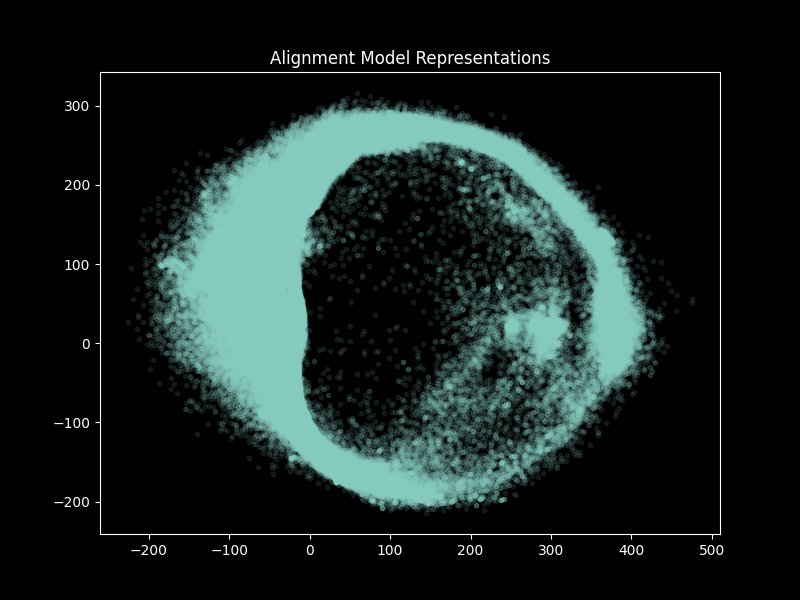

In [36]:
from SeqRep.visualize import repr_scatterplot
repr_scatterplot(aln_reprs, "Alignment Model Representations", savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

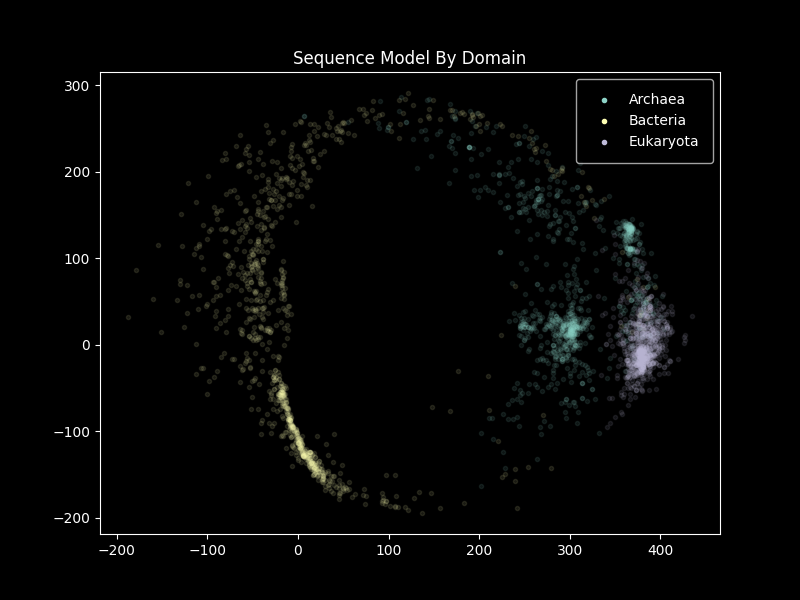

In [37]:
from SeqRep.visualize import reprs_by_label
reprs_by_label(aln_reprs, dataset, 'Domain', 'Sequence Model By Domain', savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

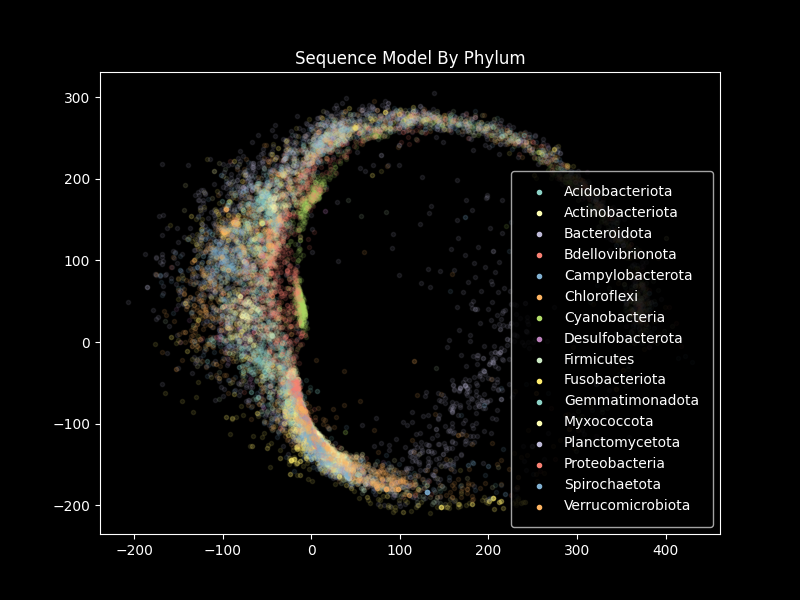

In [38]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Domain', 'Bacteria')
reprs_by_label(aln_reprs, dataset, 'Phylum', 'Sequence Model By Phylum', filter=1000, mask=mask, savepath='out.png')
from IPython.display import Image
Image(filename='out.png')

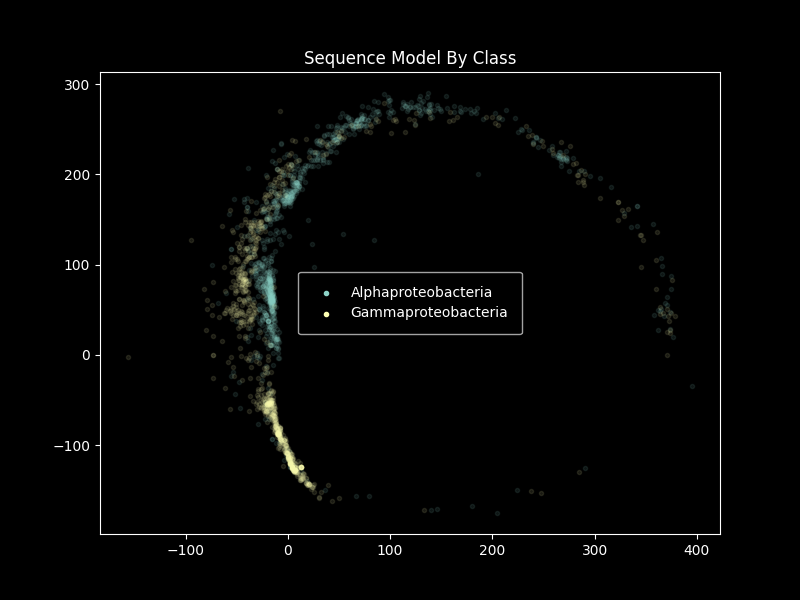

In [39]:
from SeqRep.visualize import reprs_by_label
mask = dataset['labels'].label_mask('Phylum', 'Proteobacteria')
reprs_by_label(aln_reprs, dataset, 'Class', 'Sequence Model By Class', filter=1000, mask=mask, savepath='out.png')
from IPython.display import Image
Image(filename='out.png')